In [1]:
%matplotlib inline

- Carga mascara
- binariza (Aquí en lugar de con la binarizacion de la mascara, habría que probar con el resultado de nuestro procesamiento)
- hough probabilistica 
- Filtrar por direcciones
TODO: Funciones para cargar imagenes a lo paquete data.

In [2]:
#pathMasc="/home/jose/Dropbox/SURCOS/perfiles/imagenesParaEnviar/1muyvisiblesbastantefiable/9stmarcado.bmp"
#pathImg="/home/jose/Dropbox/SURCOS/perfiles/imagenesParaEnviar/1muyvisiblesbastantefiable/9storiginal.bmp"
#pathCSV="/home/jose/Dropbox/SURCOS/perfiles/imagenesParaEnviar/1muyvisiblesbastantefiable/9stlinea.csv"

pathMasc="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\1muyvisiblesbastantefiable\\9stmarcado.bmp"
pathImg="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\1muyvisiblesbastantefiable\\9storiginal.bmp"
pathCSV="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\1muyvisiblesbastantefiable\\9stlinea.csv"

In [3]:
from Procesado import *

proc = Procesado()

In [4]:
msc = proc.leerImagen(pathMasc)

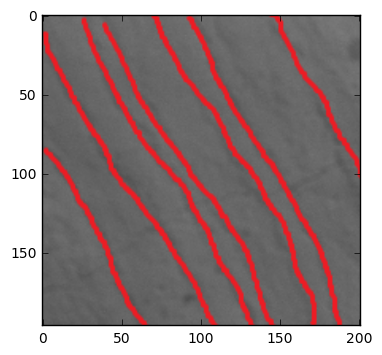

In [5]:
import matplotlib.pyplot as plt


plt.imshow(msc)

In [6]:
'''
Muesta imagen con los segmentos superpuestos
'''
def mostrar(imagen,segmentos):
    plt.figure(figsize=(12, 12)) 
    plt.imshow(imagen, cmap=plt.cm.gray)
    for line in segmentos:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'b',linewidth=1)
    #fig.savefig('foo.jpg',bbox_inches='tight')

'''
Muestra el segmento i-esimo
'''
def mostrarI(imagen,segmentos,i):
    plt.figure(figsize=(12, 12)) 
    plt.imshow(imagen, cmap=plt.cm.gray)
    for line in segmentos:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'b',linewidth=1)
    
    p0, p1 = segmentos[i]
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'r',linewidth=2)
    #fig.savefig('foo.jpg',bbox_inches='tight')
    
'''

Muestra imagen con los segmentos combinados (de multiples segmentos se crea uno que los une a todos)
Solo muestra el segmento combinado i-esimo
'''    
def mostrarK(imagen,segmentos,k_components,index):
    plt.figure(figsize=(12, 12)) 
    plt.imshow(imagen, cmap=plt.cm.gray)
    
    
    segToShow=list(map(lambda x:segmentos[x],k_components[1][index]))
    
    for line in segToShow:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'b',linewidth=1)
        
        
    procesado=Procesado()        
    combinado = procesado.combinaSegmentos(segToShow)
    p0, p1 = combinado   
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'r',linewidth=3)


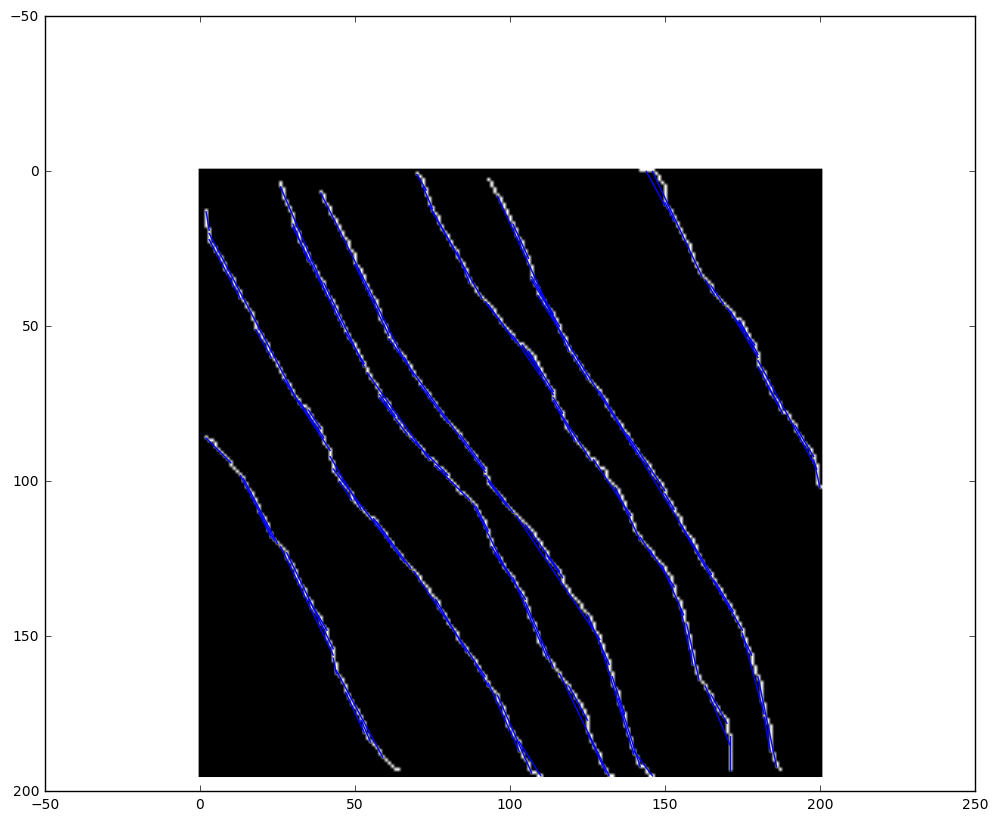

In [7]:
mscRojo = proc.distanciaAlRojo(msc)
mscbin = proc.binarizar(mscRojo)
sk=proc.reducirGrosor(mscbin)

# threshold,line_length,line_gap
lines=proc.proHough(5,5,11,sk)

mostrar(sk,lines)

In [8]:
# las diez primeras lineas
lines[:10]

[((105, 138), (95, 123)),
 ((114, 160), (105, 139)),
 ((175, 148), (155, 114)),
 ((141, 91), (109, 40)),
 ((119, 58), (96, 8)),
 ((53, 62), (47, 52)),
 ((165, 130), (129, 71)),
 ((74, 93), (54, 65)),
 ((112, 157), (101, 131)),
 ((66, 61), (39, 7))]

In [9]:
# las 10 primeras lineas con su orientacion
list(map(lambda linea: [proc.angu(linea)]+[linea], lines[:10])) 


[[56.309932474020215, ((105, 138), (95, 123))],
 [66.80140948635182, ((114, 160), (105, 139))],
 [59.53445508054013, ((175, 148), (155, 114))],
 [57.89374404488216, ((141, 91), (109, 40))],
 [65.2975697722287, ((119, 58), (96, 8))],
 [59.03624346792648, ((53, 62), (47, 52))],
 [58.6097318958122, ((165, 130), (129, 71))],
 [54.46232220802562, ((74, 93), (54, 65))],
 [67.06789956241022, ((112, 157), (101, 131))],
 [63.43494882292201, ((66, 61), (39, 7))]]

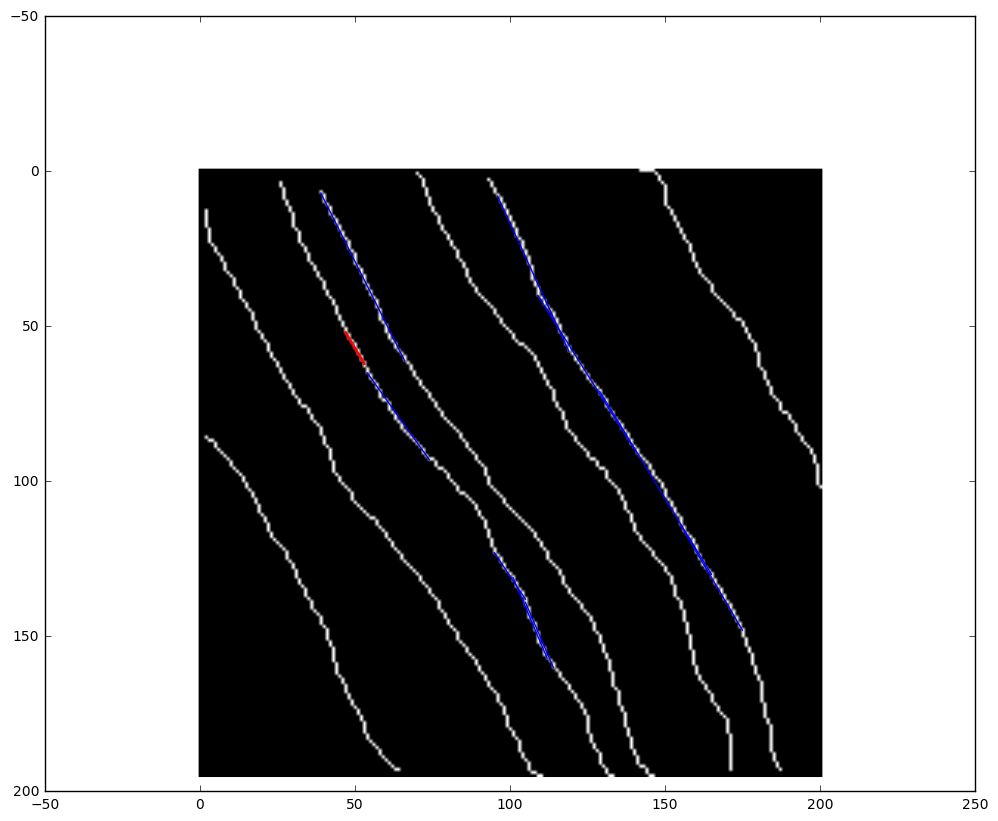

In [10]:
# muestra interactivamente cada uno de los 10 primeros segmentos
interact(mostrarI, i=(0,10), 
         imagen=fixed(sk),
         segmentos=fixed(lines[:10]));

Lo que vamos a hacer es comprobar el angulo de los segmentos y eliminar aquellos segmentos cuyo angulo sea perpendicular al eje X. 
Los angulos van en radianes.

_______________


En el proyecto de Ismael se combinaban los segmentos entre si para recomponer las lineas.

combina y combina2 crean un grafo G que relaciona dos segmentos si la diferencia entre sus angulos es poca y otra serie de criterios.

El algoritmo k_components obtiene los grupos de segmentos que están relacionados entre si.

A lo mejor podemos modificar y utilizar esto también.


In [11]:
G=nx.Graph()

#distancia1 es la distancia cuando están paralelas
#distancia2 es la distancia cuando están consecutivas (puede ser mayor)
#diffOrientacion
#longcorto si un segmento es corto lo combino sin importar la orientación 
'''
G=proc.combina2(3,10,5,5,lines,G)
k_components = apxa.k_components(G)
segmentosDeVerdad=proc.segmentosVerdad(k_components,lines)
'''

G=proc.combina2(3,5,5,5,lines,G)
k_components = apxa.k_components(G)
segmentosDeVerdad=proc.segmentosVerdad(k_components,lines)

# usa hough a pelo

# usa dos pasadas, la primera estricta, la segunda solo combina consecutivas

# haz una nueva versión que devuelva polilineas
# polilinea va a ser una clase, con longitud y angulo. La longitud es la suma de las lineas, el angulo el global


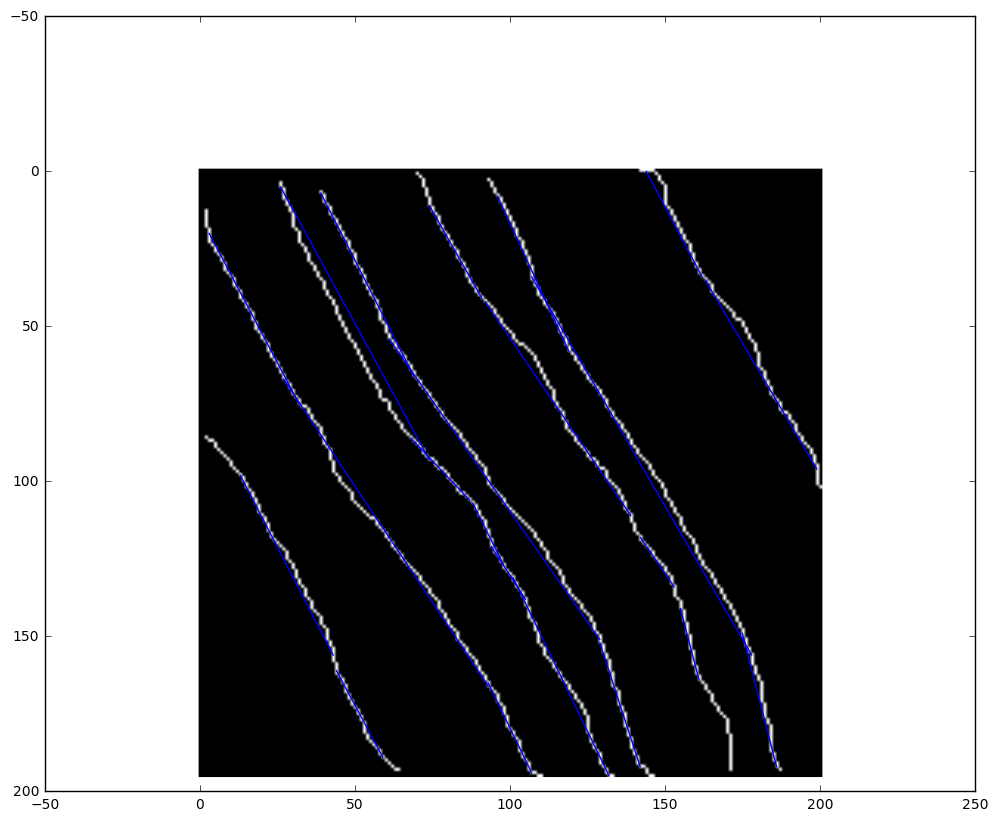

In [12]:
mostrar(sk,segmentosDeVerdad)

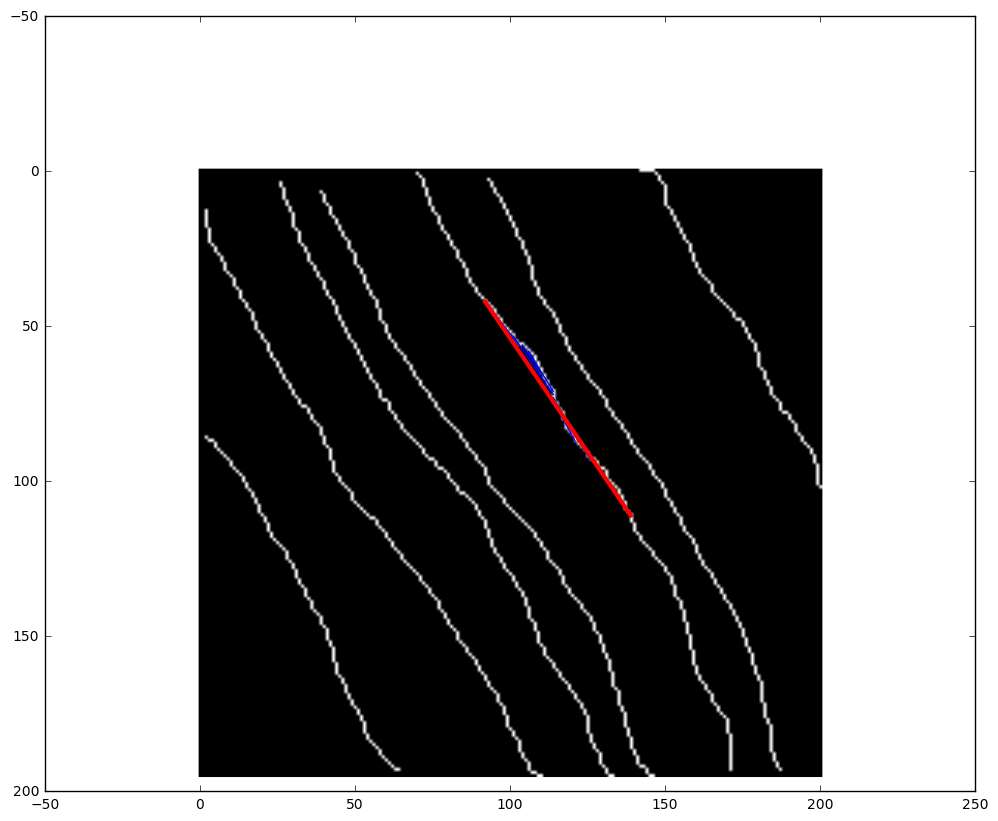

In [13]:
interact(mostrarK, index=(0,len(k_components[1])-1), 
         imagen=fixed(sk),
         segmentos=fixed(lines),
         k_componentes=fixed(k_components));

In [14]:
def modulo(linea):
    p1,p2=linea 
    x1,y1 = p1
    x2,y2 = p2
    
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

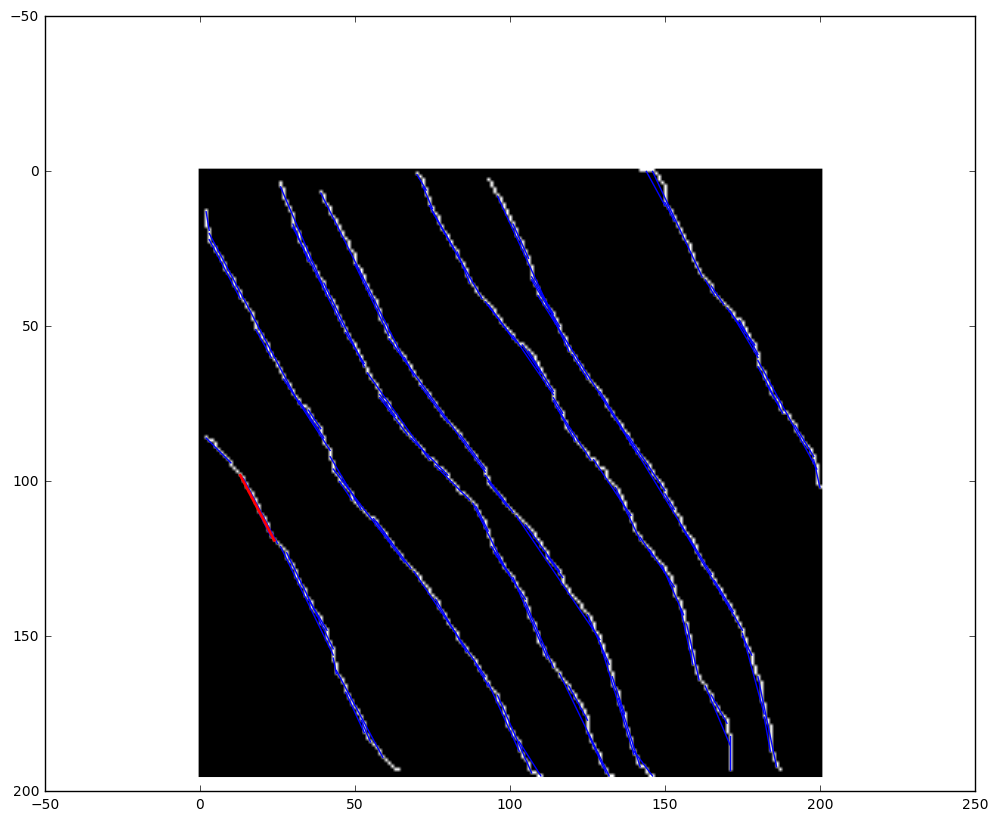

In [15]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

interact(mostrarI, 
         imagen=fixed(sk),
         segmentos=fixed(lines),
         i=(0,len(lines)));